## Data analize with Kaggle.com

#### Read the csv file (use the read_csv function). Output the first five lines (the head function is used)

In [1]:
import pandas as pd

df = pd.read_csv("bestsellers with categories.csv")
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


#### Display the dimensions of the dataset (use the shape attribute)

In [3]:
print(df.shape)

(550, 7)


* Про скільки книг зберігає дані датасет?
> Відповідь: 550

#### Change the names for columns 

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


## Primary data analysis

#### Count the proportion of missing values in each column

In [5]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df.shape[0]
print("\n",missing_values_proportion)

Missing values:
 name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

 name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


* Чи є в якихось змінних пропуски? (Так / ні)
> Відповідь: ні

#### Find unique genres

In [6]:
unique_genres = df["genre"].unique()
print(unique_genres)

['Non Fiction' 'Fiction']


*  Які є унікальні жанри?
> Відповідь: Non Fiction, Fiction

#### Build the diagram

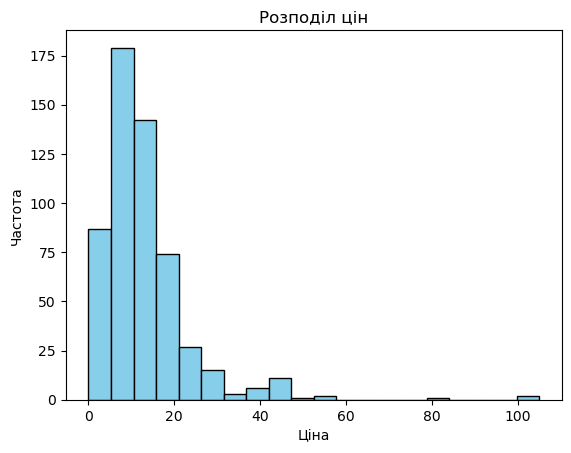

In [8]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

plt.show()


#### Find min, max, mean, median price

In [9]:
max_price = df["price"].max()
min_price = df["price"].min()
mean_price = df["price"].mean()
median_price = df["price"].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


*  Максимальна ціна?
> Відповідь: 105

*  Мінімальна ціна?
> Відповідь: 0

*  Середня ціна?
> Відповідь: 13.1

*  Медіанна ціна?
> Відповідь: 11

#### The highest rating

In [10]:
max_rating = df["user_rating"].max()
print(max_rating)

4.9


#### Amount of books with highest rating

In [11]:
top_rated_books = df[df["user_rating"] == max_rating]

print(f"Кількість книг з найвищим рейтингом: {len(top_rated_books)}")

Кількість книг з найвищим рейтингом: 52


#### The book with the biggest numbers of reviews

In [15]:
max_review = df["reviews"].max()
print(max_review)
top_reviewed_books = df[df["reviews"] == max_review]

print(f"Kнига має найбільше відгуків: {top_reviewed_books}")

87841
Kнига має найбільше відгуків:                         name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


#### The most expensive book of 2015

In [22]:
books_2015 = df[df["year"] == 2015]

most_expensive = books_2015["price"].max()

most_expensive_book_name = books_2015.loc[books_2015["price"] == most_expensive, "name"].item()
print(f"Hайдорожча Kнига у 2015 році: {most_expensive_book_name}")

Hайдорожча Kнига у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


#### Find how many Fiction books were in the Top 50 in 2010 (use &)

In [9]:
fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]

print(f"Кількість книг Fiction у Топ-50 2010 року: {len(fiction_books_2010)}")

Кількість книг Fiction у Топ-50 2010 року: 20


#### How many books rated 4.9 were ranked in 2010 and 2011 (use | or the isin function)?

In [13]:
books_49_rating = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]

books_count = len(books_49_rating)

print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", books_count)

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


#### Sort by increasing price all the books that made it into the ranking in 2015 and cost less than $8 (use the sort_values function)

In [18]:
books_2015 = df[df['year'] == 2015]
cheap_books_2015 = books_2015[books_2015['price'] < 8]
sorted_by_price = cheap_books_2015.sort_values("price")
print(sorted_by_price)
print("\nThe last book:\n", sorted_by_price.iloc[-1])

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

* Який рейтинг у датасеті найвищий? 
> Відповідь: 4.9

* Скільки книг мають такий рейтинг?
> Відповідь: 52

* Яка книга має найбільше відгуків?
> Відповідь: Where the Crawdads Sing  Delia Owens

* З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
> Відповідь: Publication Manual of the American Psychological Association, 6th Edition

* Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
> Відповідь: 20

* Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
> Відповідь: 1

* Яка книга остання у відсортованому списку? 
> Відповідь: Old School (Diary of a Wimpy Kid #10)

## Aggregation of data and connection of tables

#### Find the max/min price for all genres

In [19]:
grouped_by_genre = df.groupby("genre")

aggregated_prices = grouped_by_genre["price"].agg(["max", "min"])

print(aggregated_prices)

             max  min
genre                
Fiction       82    0
Non Fiction  105    0


* Максимальна ціна для жанру Fiction? 
> Відповідь: 82

* Мінімальна ціна для жанру Fiction? 
> Відповідь: 0

* Максимальна ціна для жанру Non Fiction? 
> Відповідь: 105

* Мінімальна ціна для жанру Non Fiction? 
> Відповідь: 0

#### DataFrame with amount of books for each author

In [41]:
grouped_by_auhtor = df.groupby("author")
aggregated_authors = grouped_by_auhtor["name"].agg(["count"])

print("Size of tabel\n", aggregated_authors.shape)
print("\nAuthor with most popular books(amount):\n", aggregated_authors.max())
print("\nAuthor with most popular books(name):\n", aggregated_authors.idxmax()[0])

Size of tabel
 (248, 1)

Author with most popular books(amount):
 count    12
dtype: int64

Author with most popular books(name):
 Jeff Kinney


* Якої розмірності вийшла таблиця? 
> Відповідь: (248, 1)

* Який автор має найбільше книг? 
> Відповідь: Jeff Kinney

* Скільки книг цього автора? 
> Відповідь: 12

#### Create a dataframe that will hold the average rating for each author (use the "groupby" and "agg" functions, use "mean" to calculate the average value).

In [42]:
grouped_by_auhtor = df.groupby("author")
aggregated_authors_mean = grouped_by_auhtor["user_rating"].agg(["mean"])
#print(aggregated_authors.head())

print("Min rating: ", aggregated_authors_mean.min())
print("Author with Min rating: ", aggregated_authors_mean.idxmin()[0])

Min rating:  mean    3.9
dtype: float64
Author with Min rating:  Donna Tartt


* У якого автора середній рейтинг мінімальний?
> Відповідь: Donna Tartt

*  Який у цього автора середній рейтинг?
> Відповідь: 3.9

#### Concatenate the last two dataframes so that the number of books and the average rating are visible for each author (Use the "concat" function with axis=1). Save the result to a variable

In [43]:
combined_df = pd.concat([aggregated_authors, aggregated_authors_mean], axis=1)
result = combined_df
print(result.to_string())

                                    count      mean
author                                             
Abraham Verghese                        2  4.600000
Adam Gasiewski                          1  4.400000
Adam Mansbach                           1  4.800000
Adir Levy                               1  4.800000
Admiral William H. McRaven              1  4.700000
Adult Coloring Book Designs             1  4.500000
Alan Moore                              1  4.800000
Alex Michaelides                        1  4.500000
Alice Schertle                          1  4.900000
Allie Brosh                             1  4.700000
American Psychiatric Association        2  4.500000
American Psychological Association     10  4.500000
Amor Towles                             1  4.700000
Amy Ramos                               2  4.300000
Amy Shields                             1  4.800000
Andy Weir                               1  4.700000
Angie Grace                             1  4.600000
Angie Thomas

#### Sort the dataframe by increasing number of books and increasing rating (use the "sort_values" function)

In [46]:
sorted_df = combined_df.sort_values(by=['count', 'mean'])
print(sorted_df.head())

(248, 2)
                   count  mean
author                        
Muriel Barbery         1   4.0
Chris Cleave           1   4.1
Ian K. Smith M.D.      1   4.1
Pierre Dukan           1   4.1
Elizabeth Strout       1   4.2


* Який автор перший у списку?
> Відповідь: Muriel Barbery

### Diagrams:

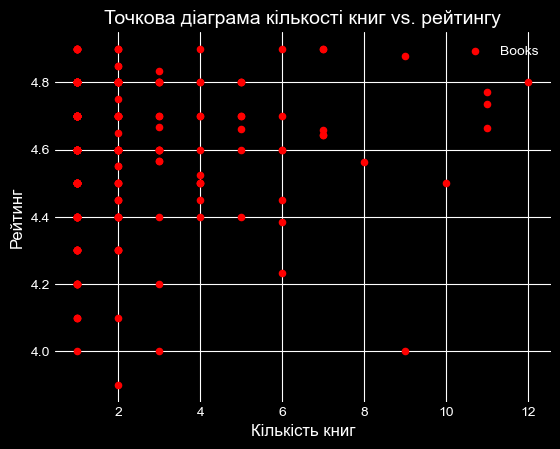

In [55]:
# scatter plot ("Точкова діаграма") for the number of books vs. the rating
import matplotlib.pyplot as plt
plt.style.use('dark_background')

combined_df.plot.scatter(x='count', y='mean', color='r')

plt.xlabel('Кількість книг', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.title('Точкова діаграма кількості книг vs. рейтингу', fontsize=14)

plt.legend(['Books'], loc='best')

plt.show()

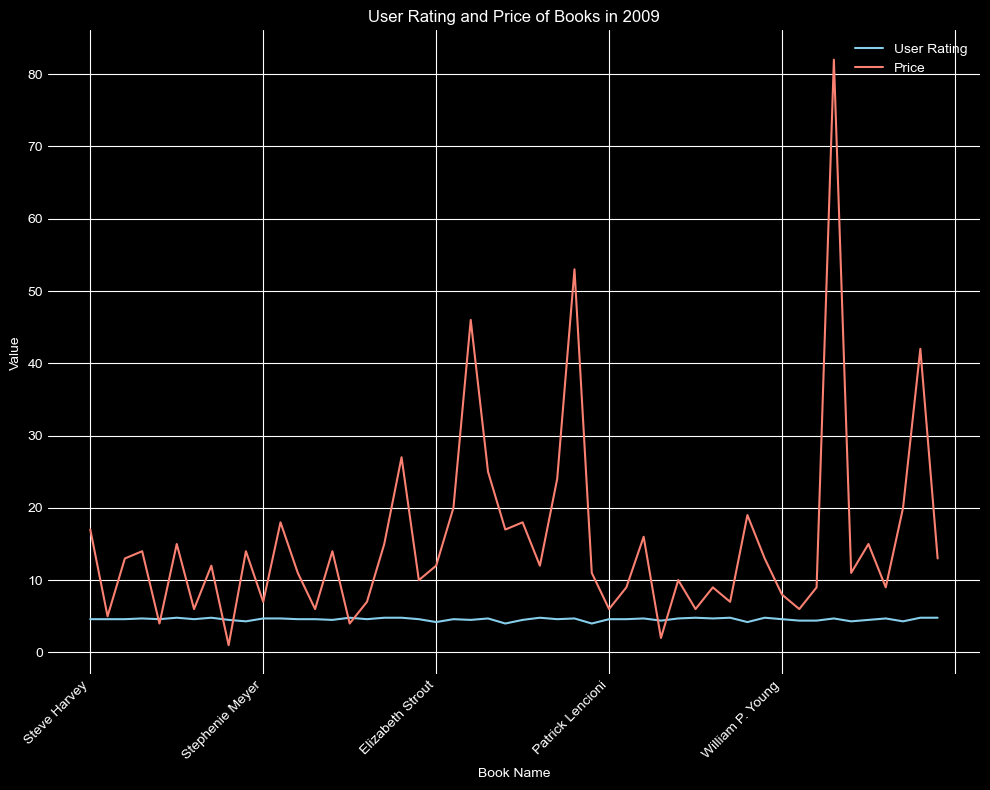

In [75]:
# Two graphics on one plot

# Filter data for the year 2009
# to have graphic for few maybe(3) use df_2009 = df[df['year'] == 2009].head(3)
df_2009 = df[df['year'] == 2009]

# Create two subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the first subplot
df_2009.plot(x='author', y='user_rating', color='skyblue', ax=ax, label='User Rating')
# Plot the second subplot
df_2009.plot(x='author', y='price', color='salmon', ax=ax, label='Price')

# Set title and labels
ax.set_title('User Rating and Price of Books in 2009')
ax.set_xlabel('Book Name')
ax.set_ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# legend
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()